# CellxGENE Metadata

The CZ CELLxGENE Discover Census provides efficient computational tooling to access, query, and analyze all single-cell RNA data from [CZ CELLxGENE Discover](https://cellxgene.cziscience.com/). See the documentation [here](https://github.com/chanzuckerberg/cellxgene-census/blob/main/api/python/notebooks/analysis_demo/comp_bio_explore_and_load_lung_data.ipynb) for more details.

First, load relevant packages.

In [1]:
# standard imports
import numpy as np
import pandas as pd
import os
import time

# matplotlib imports
import matplotlib.pyplot as plt
plt.ion()   # interactive mode

# torch imports
import torch

# import CELLxGENE
import cellxgene_census

# import project config file
import sys
sys.path.append('../../..')
import project_config

The `cellxgene_census` Python package contains a convenient API to open the latest version of the Census. Use a Python context manager to open the Census. At the time of writing, the stable version of the Census was `"2023-05-15"`, which is specified for reproducibility.

Consider, for example, the line `census["census_info"]["summary"].read().concat().to_pandas()`.

In order, this line reads the `SOMADataFrame` as a slice, concatenates the results to a `pyarrow.Table`, then converts the result to a `pandas.DataFrame`.

In [2]:
# open census
with cellxgene_census.open_soma(census_version = "2023-05-15") as census:

    # get general census info
    # census_info = census["census_info"]["summary"].read().concat().to_pandas()

    # get cell metadata
    # cell_metadata = census["census_data"]["homo_sapiens"].obs.read().concat().to_pandas()

    # get unique values from cell metadata tissue_general column
    # tissue_counts = cell_metadata["tissue_general"].value_counts()

    # get metadata for cells in brain and spinal cord
    # remove duplicate cells present across multiple datasets with is_primary_data == True
    # for brain data, reduces from approx. 16M to 9M with is_primary_data == True
    nervous_metadata = (
        census["census_data"]["homo_sapiens"]
        .obs.read(value_filter="is_primary_data == True and tissue_general in ['brain', 'spinal cord']")
        .concat()
        .to_pandas()
    )

nervous_metadata.head()

,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,is_primary_data,self_reported_ethnicity,self_reported_ethnicity_ontology_term_id,sex,sex_ontology_term_id,suspension_type,tissue,tissue_ontology_term_id,tissue_general,tissue_general_ontology_term_id
0,6307791,c2876b1b-06d8-4d96-a56b-5304f815b99a,10x 3' v3,EFO:0009922,oligodendrocyte,CL:0000128,85-year-old human stage,HsapDv:0000211,normal,PATO:0000461,...,True,admixed ancestry,HANCESTRO:0306,female,PATO:0000383,nucleus,middle temporal gyrus,UBERON:0002771,brain,UBERON:0000955
1,6307792,c2876b1b-06d8-4d96-a56b-5304f815b99a,10x 3' v3,EFO:0009922,L2/3-6 intratelencephalic projecting glutamate...,CL:4023040,80 year-old and over human stage,HsapDv:0000095,normal,PATO:0000461,...,True,European,HANCESTRO:0005,female,PATO:0000383,nucleus,middle temporal gyrus,UBERON:0002771,brain,UBERON:0000955
2,6307793,c2876b1b-06d8-4d96-a56b-5304f815b99a,10x 3' v3,EFO:0009922,L2/3-6 intratelencephalic projecting glutamate...,CL:4023040,82-year-old human stage,HsapDv:0000208,normal,PATO:0000461,...,True,European,HANCESTRO:0005,female,PATO:0000383,nucleus,middle temporal gyrus,UBERON:0002771,brain,UBERON:0000955
3,6307794,c2876b1b-06d8-4d96-a56b-5304f815b99a,10x 3' v3,EFO:0009922,near-projecting glutamatergic cortical neuron,CL:4023012,80 year-old and over human stage,HsapDv:0000095,normal,PATO:0000461,...,True,European,HANCESTRO:0005,male,PATO:0000384,nucleus,middle temporal gyrus,UBERON:0002771,brain,UBERON:0000955
4,6307795,c2876b1b-06d8-4d96-a56b-5304f815b99a,10x 3' v3,EFO:0009922,oligodendrocyte,CL:0000128,68-year-old human stage,HsapDv:0000162,dementia,MONDO:0001627,...,True,European,HANCESTRO:0005,male,PATO:0000384,nucleus,middle temporal gyrus,UBERON:0002771,brain,UBERON:0000955


### Cell Types

Tabulate cell types available in the brain and spinal cord.

In [11]:
nervous_groups = nervous_metadata.groupby(['tissue', 'tissue_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'dataset_id']).size().reset_index(name='cell_counts')
nervous_groups.cell_counts.sum()

In [10]:
# get nervous counts for tissue and cell type
print("Total Cells in Nervous Subset: ", nervous_metadata.shape[0])
nervous_tissue_count = nervous_metadata['tissue_general'].value_counts()
nervous_cell_count = nervous_metadata['cell_type'].value_counts()
print("\nCell Type Count: ", len(nervous_cell_count))
# print(", ".join(nervous_cell_count.index))
print("\nTop 10 Cell Types:")
nervous_cell_count

Total Cells in Nervous Subset:  9339682

Cell Type Count:  108

Top 10 Cell Types:


neuron                                                                2670796
glutamatergic neuron                                                  1516684
oligodendrocyte                                                        692112
L2/3-6 intratelencephalic projecting glutamatergic cortical neuron     570917
astrocyte                                                              495095
                                                                       ...   
capillary endothelial cell                                                  2
endothelial cell of lymphatic vessel                                        2
goblet cell                                                                 1
mesothelial cell                                                            1
stratified epithelial cell                                                  1
Name: cell_type, Length: 108, dtype: int64

/tmp/ipykernel_14403/3941973837.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cmap = cm.get_cmap('YlGnBu')
/tmp/ipykernel_14403/3941973837.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


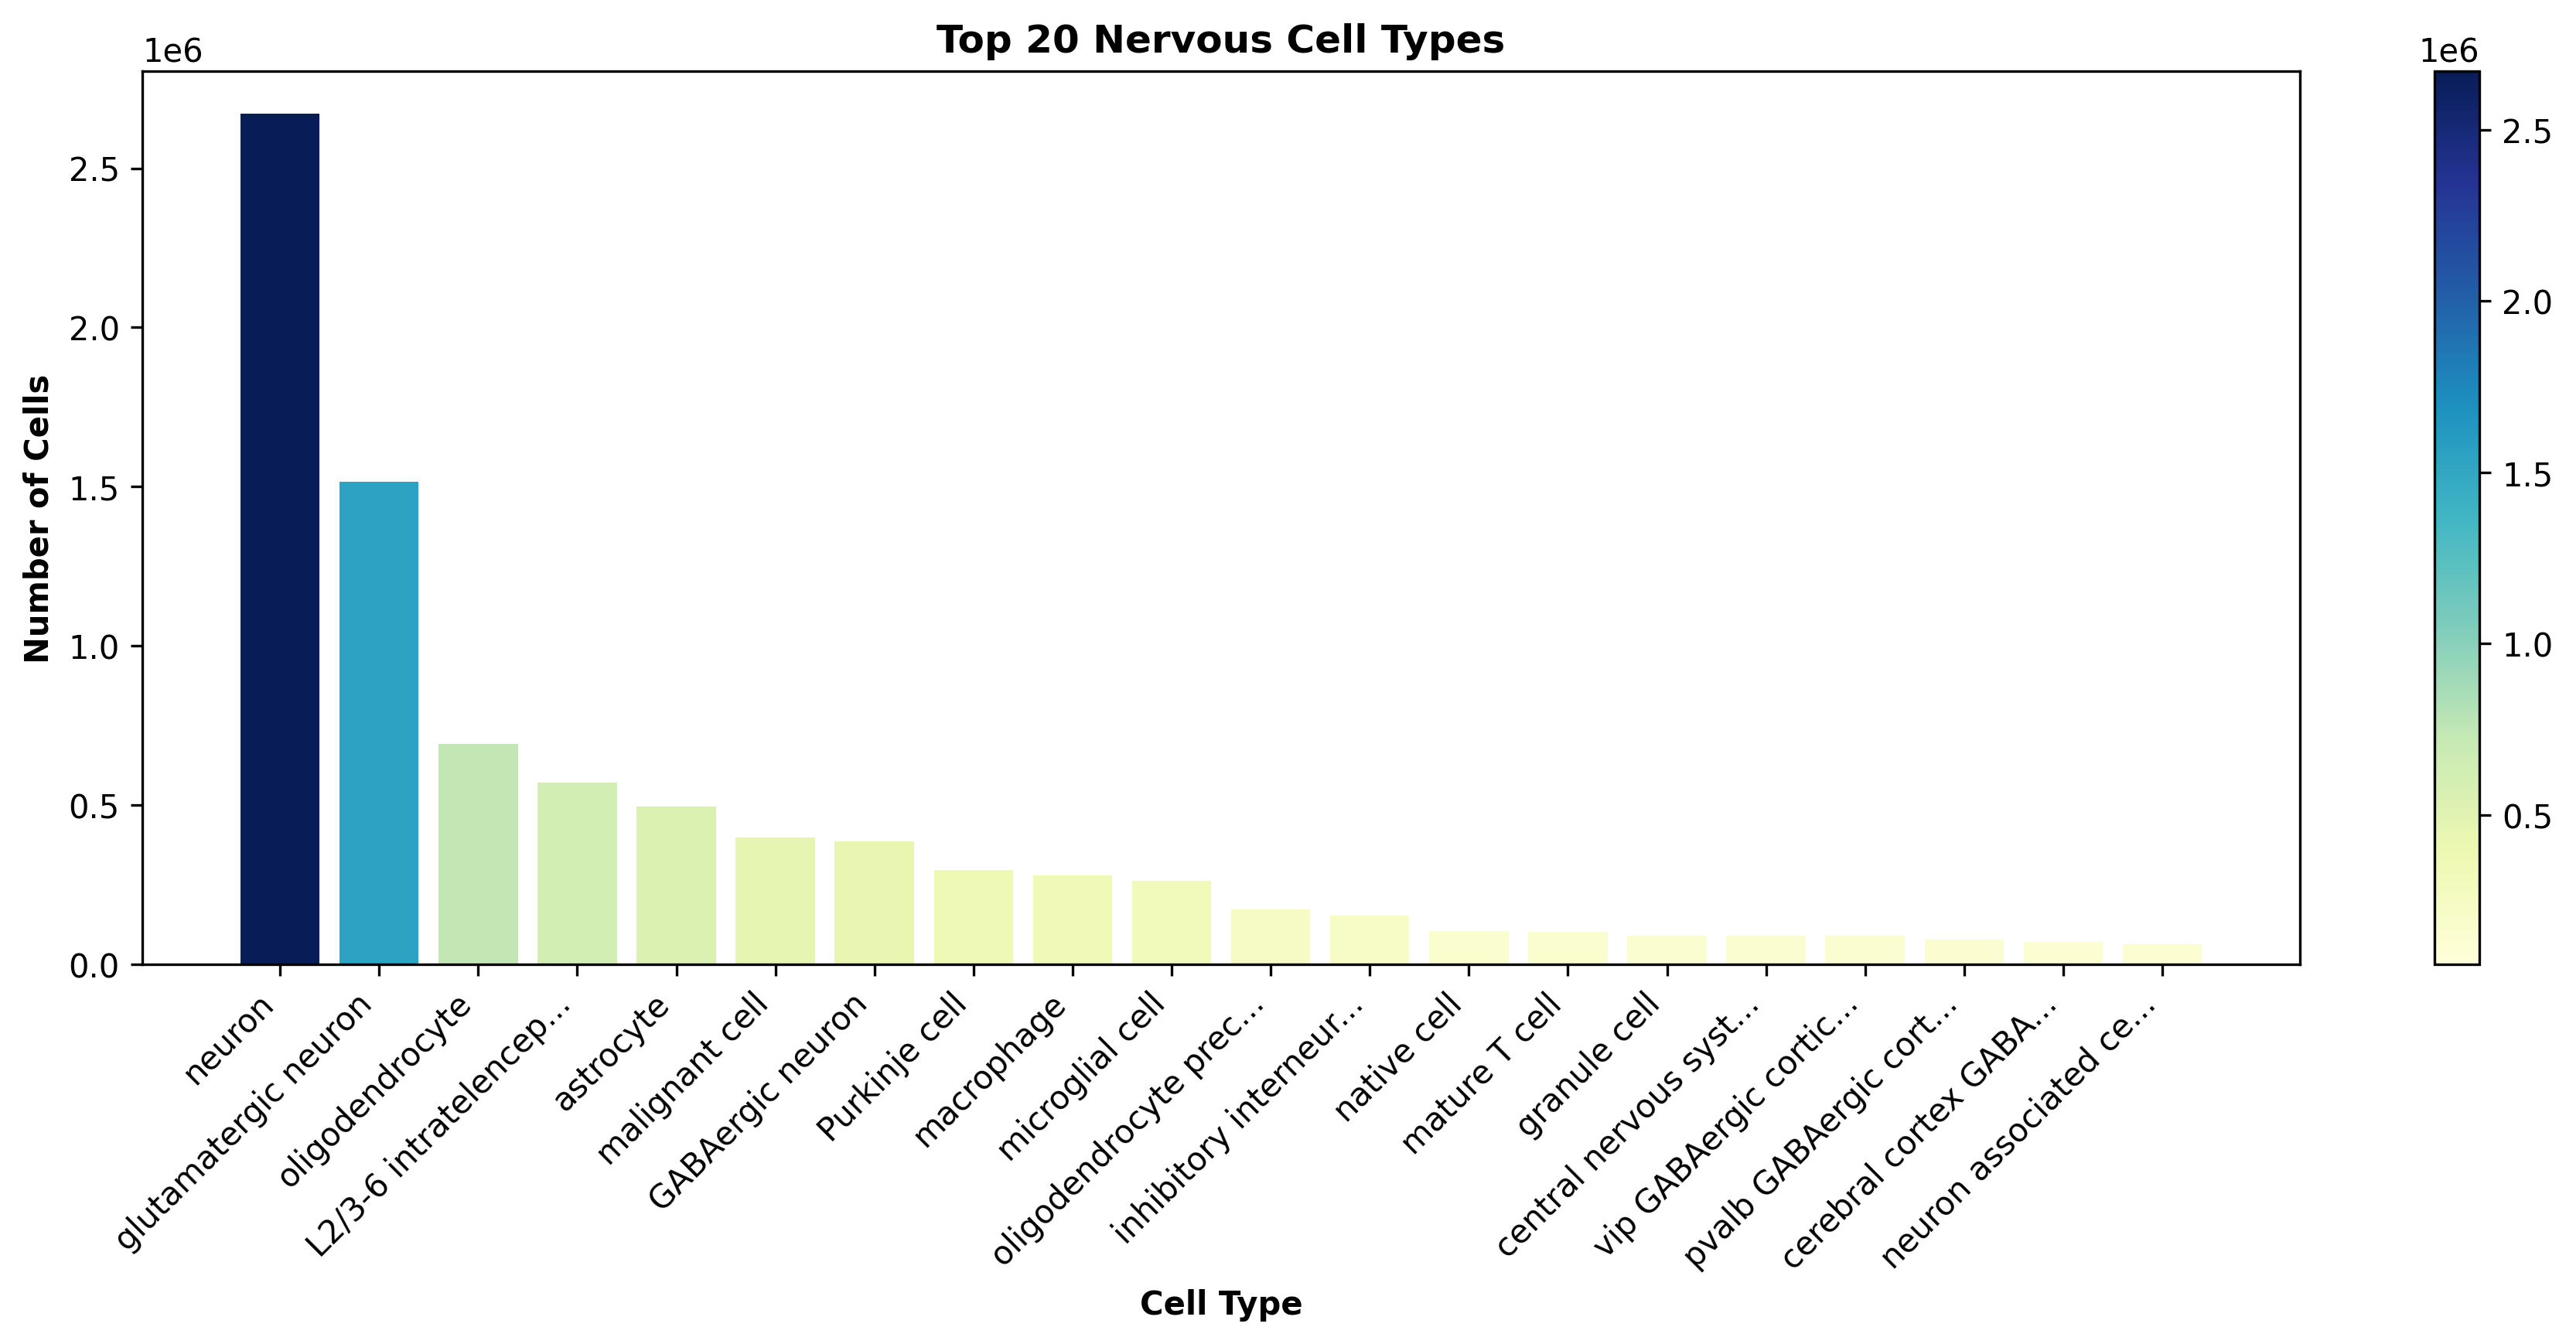

In [8]:
import matplotlib.cm as cm

# define figure size
plt.figure(figsize=(15, 5), dpi=300)

# apply logarithmic transformation to the values
top_values = nervous_cell_count.nlargest(20)
# log_values = np.log10(top_values)

# define a custom colormap
custom_cmap = cm.get_cmap('YlGnBu')

# plot the bars with color based on the logarithm of values
bars = plt.bar(top_values.index, top_values, color=custom_cmap(top_values / top_values.max()))

# plot labels
plt.xlabel('Cell Type', fontweight='bold')
plt.ylabel('Number of Cells', fontweight='bold')
plt.title('Top 20 Nervous Cell Types', fontweight='bold')
truncated_labels = [label[:20] + '...' if len(label) > 20 else label for label in top_values.index]
plt.xticks(range(len(top_values)), truncated_labels, rotation=45, ha='right')

# add colorbar for reference
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=top_values.min(), vmax=top_values.max()))
sm.set_array([])
plt.colorbar(sm)

plt.show()

### Datasets

Explore the datasets and collections from [CELLxGENE Discover](https://cellxgene.cziscience.com/collections) that contribute to the nervous system data. We first use the dataset table at `census["census-info"]["datasets"]` that contains metadata of all datasets used to build the Census.

In [6]:
with cellxgene_census.open_soma(census_version = "2023-05-15") as census:

    census_datasets = (
        census["census_info"]["datasets"]
        .read(column_names=["collection_name", "dataset_title", "dataset_id", "soma_joinid"])
        .concat()
        .to_pandas()
    )
    census_datasets = census_datasets.set_index("dataset_id")

census_datasets

,collection_name,dataset_title,soma_joinid
dataset_id,,,
9d8e5dca-03a3-457d-b7fb-844c75735c83,Abdominal White Adipose Tissue,22 integrated samples,0
a6388a6f-6076-401b-9b30-7d4306a20035,A spatially resolved single cell genomic atlas...,scRNA-seq data - myeloid cells,1
842c6f5d-4a94-4eef-8510-8c792d1124bc,A spatially resolved single cell genomic atlas...,scRNA-seq data - all cells,2
74520626-b0ba-4ee9-86b5-714649554def,A spatially resolved single cell genomic atlas...,scRNA-seq data - T cells,3
396a9124-fb20-4822-bf9c-e93fdf7c999a,A spatially resolved single cell genomic atlas...,scRNA-seq data - B cells,4
...,...,...,...
f9ad5649-f372-43e1-a3a8-423383e5a8a2,Molecular characterization of selectively vuln...,Molecular characterization of selectively vuln...,557
456e8b9b-f872-488b-871d-94534090a865,Single-cell atlas of peripheral immune respons...,Single-cell atlas of peripheral immune respons...,558
2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,Construction of a human cell landscape at sing...,Construction of a human cell landscape at sing...,559


The `obs` cell metadata `pandas.DataFrame` contains a `dataset_id` column that can be used to subset the `census_dataset` `pandas.DataFrame` we just created. We look at the cell counts per `dataset_id` of the nervous system slice and then join to the dataset table to append the human-readable labels.

In [7]:
nervous_cell_counts = pd.DataFrame(nervous_metadata[["dataset_id"]].value_counts())
nervous_cell_counts = nervous_cell_counts.rename(columns={0: "cell_counts"})
nervous_cell_counts = nervous_cell_counts.merge(census_datasets, on="dataset_id")
nervous_cell_counts

,cell_counts,collection_name,dataset_title,soma_joinid
dataset_id,,,,
f7c1c579-2dc0-47e2-ba19-8165c5a0e353,2843246,A human cell atlas of fetal gene expression,Survey of human embryonic development,452
c2876b1b-06d8-4d96-a56b-5304f815b99a,1149751,SEA-AD: Seattle Alzheimer’s Disease Brain Cell...,Whole Taxonomy - MTG: Seattle Alzheimer's Dise...,22
56c4912d-2bae-4b64-98f2-af8a84389208,1092789,"Harmonized single-cell landscape, intercellula...",Extended GBmap,285
ae4f8ddd-cac9-4172-9681-2175da462f2e,457965,Human developing neocortex by area,Second Trimester Human Developing Brain Region...,415
f32c2c13-bb1a-4ffd-a457-60b64ecfa4cb,116576,Transcriptomic diversity of cell types across ...,Dissection: Cerebral cortex (Cx) - Precentral ...,115
...,...,...,...,...
d5452b83-7c3d-4d7c-ab7a-c7fece7196c5,8077,Transcriptomic diversity of cell types across ...,Dissection: Body of hippocampus (HiB) - Rostra...,130
576f193c-75d0-4a11-bd25-8676587e6dc2,7033,HTAN MSK - Single cell profiling reveals novel...,Combined samples,346
f6d9f2ad-5ec7-4d53-b7f0-ceb0e7bcd181,6877,Transcriptomic diversity of cell types across ...,Dissection: Thalamus (THM) - lateral nuclear c...,111


### Assays

We found there are 122 datasets with nervous system cells. Similarly, we look at assays available for the nervous system slice. Most assays are from 10x Genomics technologies and single-cell combinatorial indexing RNA-sequencing (sci-RNA-seq).

In [8]:
nervous_metadata['assay'].value_counts()

10x 3' v3                                   5284362
sci-RNA-seq                                 2843246
10x 3' v2                                    967403
Drop-seq                                     122638
microwell-seq                                 63318
10x 5' v1                                     31316
BD Rhapsody Whole Transcriptome Analysis      10211
Smart-seq2                                     9390
STRT-seq                                       4693
CEL-seq2                                       3105
Name: assay, dtype: int64

### Disease

Finally, we look at diseased cell counts, with `normal` indicating non-diseased cells.

In [9]:
nervous_metadata['disease'].value_counts()

normal                    7496559
glioblastoma              1096378
dementia                   484053
Alzheimer disease          182070
pilocytic astrocytoma       34291
lung adenocarcinoma         27328
trisomy 18                  16900
temporal lobe epilepsy       2103
Name: disease, dtype: int64

### Sex

We check for sex bias. Males are overrepresented in the nervous system slice.

In [10]:
nervous_metadata['sex'].value_counts()

male       6428528
female     2059167
unknown     851987
Name: sex, dtype: int64

### Suspension

We check for suspension bias. Most cells are from nuclei suspensions and not cells.

In [11]:
nervous_metadata['suspension_type'].value_counts()

nucleus    7536498
cell       1803184
Name: suspension_type, dtype: int64

### Tissues

We check for original tissue annotations mapped to `brain` or `spinal cord`.

In [44]:
nervous_metadata['tissue'].value_counts()

telencephalon                     1751246
cerebral cortex                   1308664
cerebellum                        1286908
middle temporal gyrus             1149751
cerebral nuclei                    523309
brain                              499628
thalamic complex                   343320
hippocampal formation              332202
midbrain                           249305
prefrontal cortex                  218183
pons                               204168
hypothalamus                       134471
primary visual cortex              103518
left frontal lobe                   98536
temporal lobe                       97538
parietal cortex                     94443
forebrain                           86604
right frontal lobe                  85525
myelencephalon                      85487
frontal lobe                        83708
primary motor cortex                80769
primary somatosensory cortex        64786
temporal cortex                     63920
superior frontal gyrus            

/tmp/ipykernel_5417/627898536.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cmap = cm.get_cmap('YlGnBu')
/tmp/ipykernel_5417/627898536.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


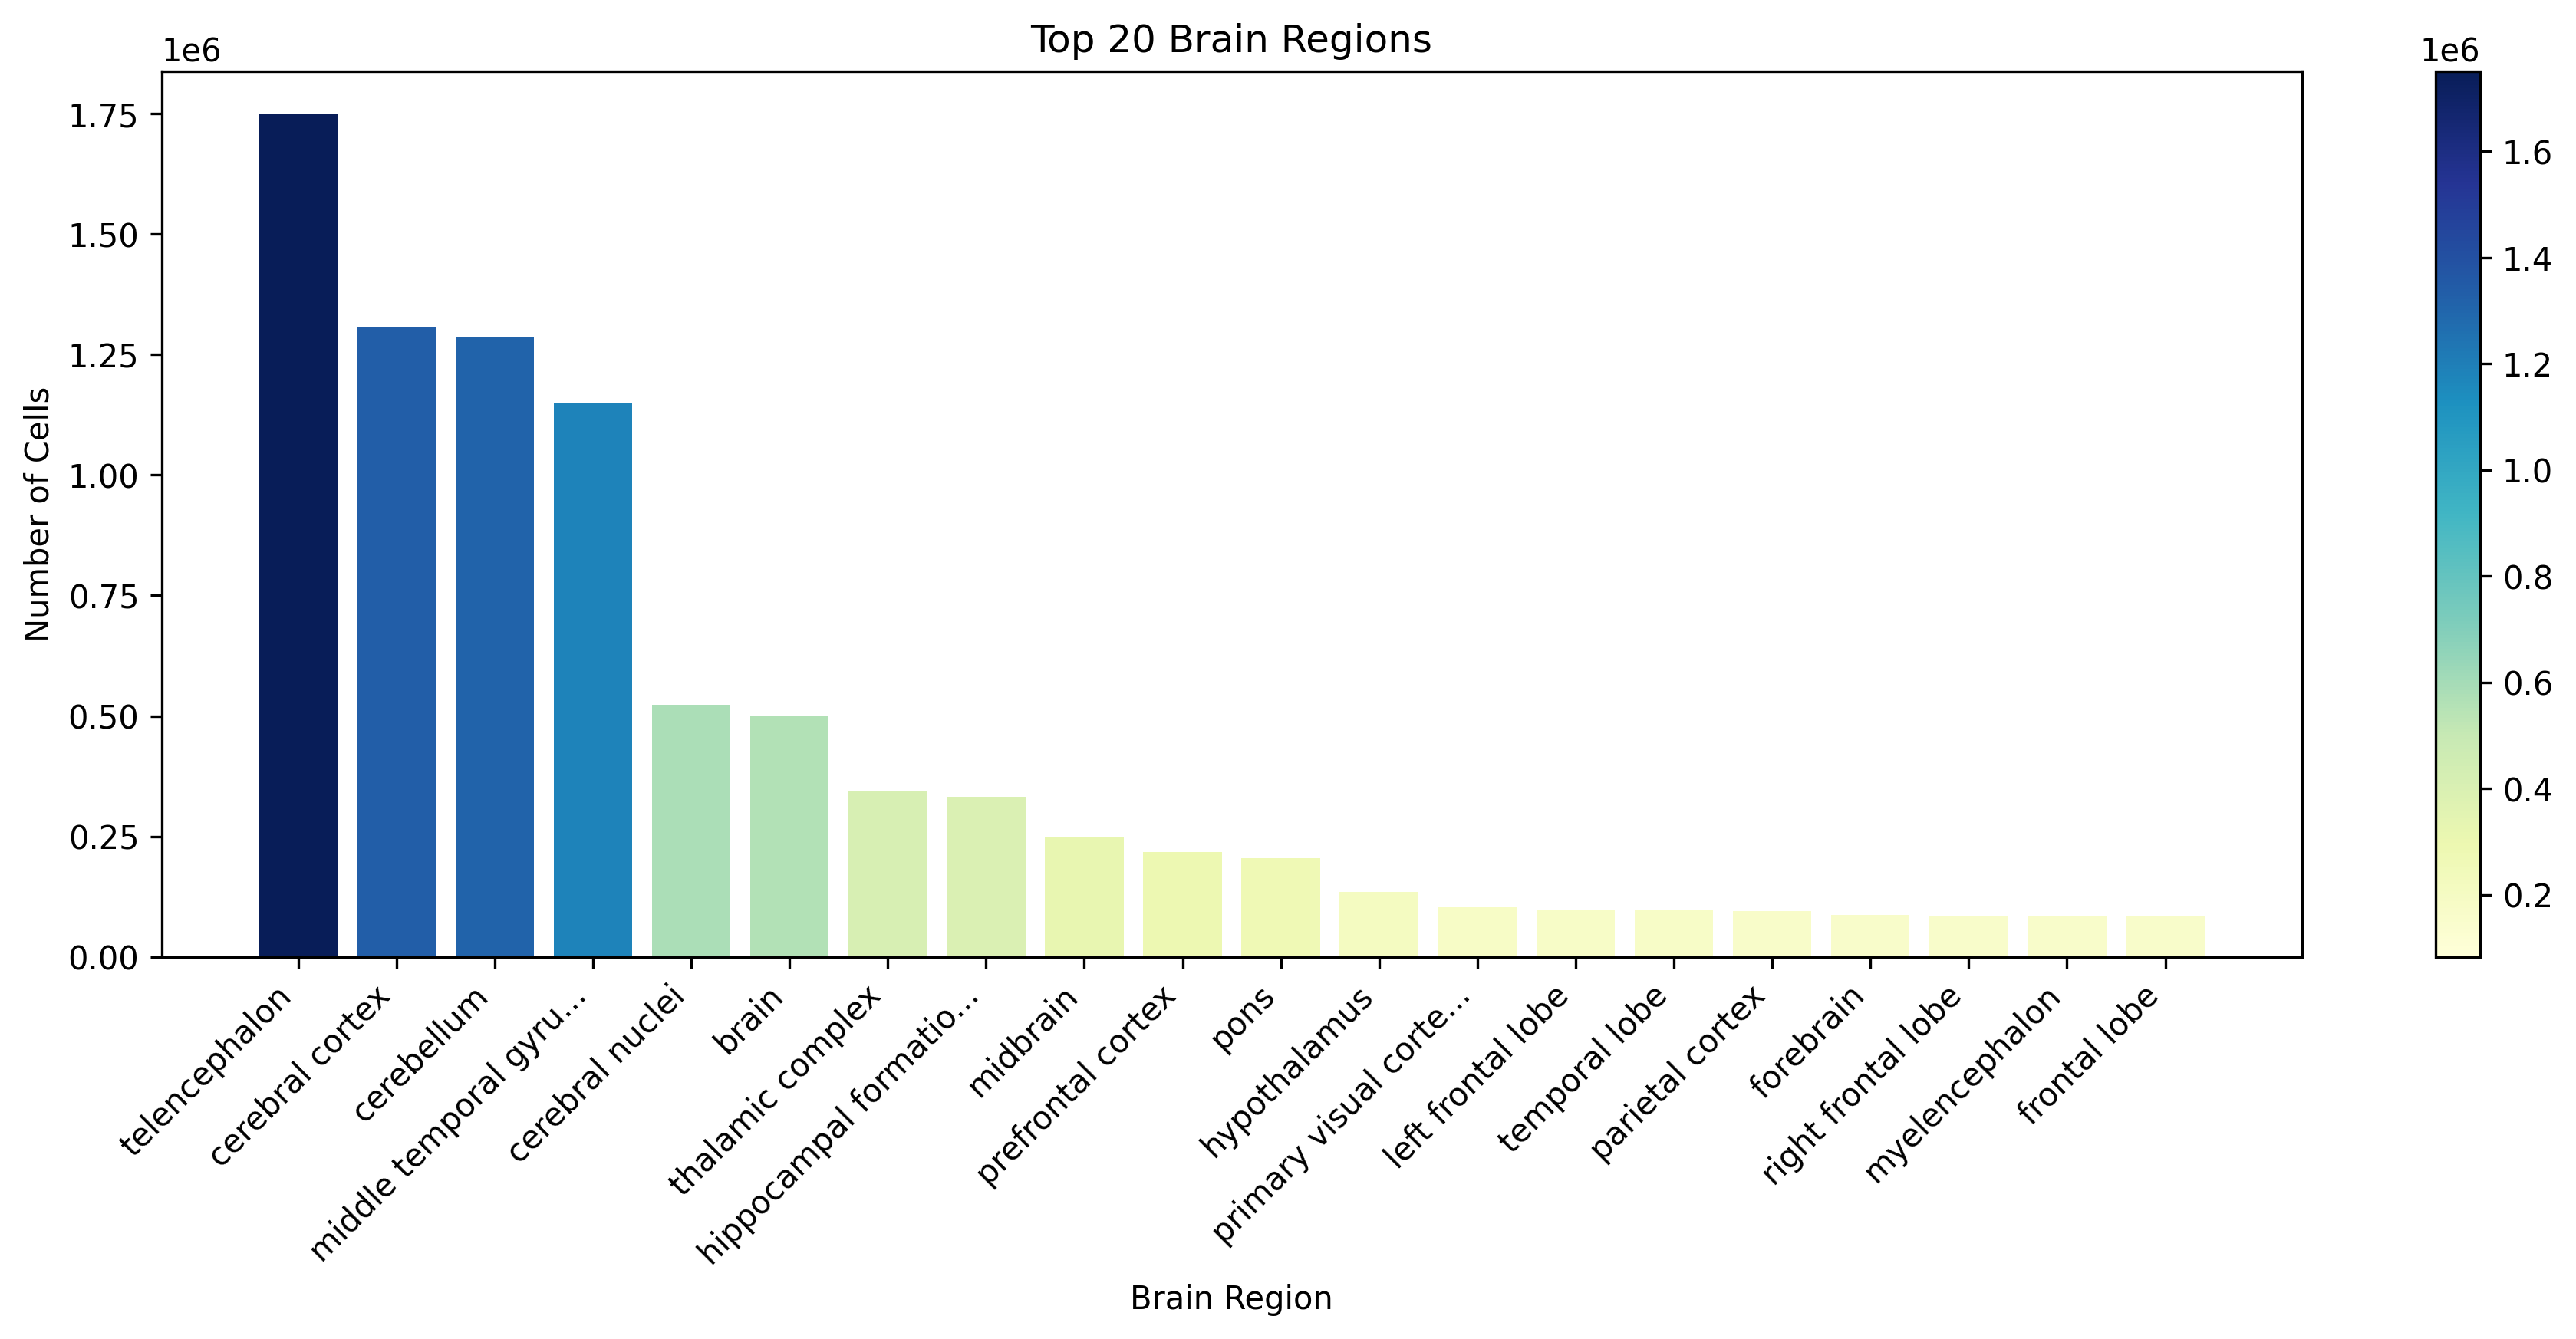

In [47]:
import matplotlib.cm as cm

# define figure size
plt.figure(figsize=(15, 5), dpi=300)

# apply logarithmic transformation to the values
top_values = nervous_metadata['tissue'].value_counts().nlargest(20)

# define a custom colormap
custom_cmap = cm.get_cmap('YlGnBu')

# plot the bars with color based on the logarithm of values
bars = plt.bar(top_values.index, top_values, color=custom_cmap(top_values / top_values.max()))

# plot labels
plt.xlabel('Brain Region')
plt.ylabel('Number of Cells')
plt.title('Top 20 Brain Regions')
truncated_labels = [label[:30] + '...' if len(label) > 30 else label for label in top_values.index]
plt.xticks(range(len(top_values)), truncated_labels, rotation=45, ha='right')

# add colorbar for reference
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=top_values.min(), vmax=top_values.max()))
sm.set_array([])
plt.colorbar(sm)

plt.show()

### Genes Expressed

Explore the genes expressed in the nervous system slice. We use the dataset presence matrix, a boolean matrix `N x M` where `N` is the number of datasets and `M` is the number of genes in the Census.

In [13]:
with cellxgene_census.open_soma(census_version = "2023-05-15") as census:

    # get nervous system presence matrix
    presence_matrix = cellxgene_census.get_presence_matrix(census, "Homo sapiens", "RNA")
    presence_matrix = presence_matrix[nervous_cell_counts.soma_joinid, :]

    # get genes measured
    genes_measured = presence_matrix.sum(axis = 1).A1
    nervous_cell_counts['genes_measured'] = genes_measured

nervous_cell_counts.head(10)

,cell_counts,collection_name,dataset_title,soma_joinid,genes_measured
dataset_id,,,,,
f7c1c579-2dc0-47e2-ba19-8165c5a0e353,2843246,A human cell atlas of fetal gene expression,Survey of human embryonic development,452,44150
c2876b1b-06d8-4d96-a56b-5304f815b99a,1149751,SEA-AD: Seattle Alzheimer’s Disease Brain Cell...,Whole Taxonomy - MTG: Seattle Alzheimer's Dise...,22,36001
56c4912d-2bae-4b64-98f2-af8a84389208,1092789,"Harmonized single-cell landscape, intercellula...",Extended GBmap,285,26355
ae4f8ddd-cac9-4172-9681-2175da462f2e,457965,Human developing neocortex by area,Second Trimester Human Developing Brain Region...,415,26639
f32c2c13-bb1a-4ffd-a457-60b64ecfa4cb,116576,Transcriptomic diversity of cell types across ...,Dissection: Cerebral cortex (Cx) - Precentral ...,115,44242
e1f595f6-ba2c-495e-9bee-7056f116b1e4,107301,Transcriptomic diversity of cell types across ...,Dissection: Cerebral cortex (Cx) - Middle Temp...,125,44486
85c60876-7f35-40c5-a256-7808d84c6ba5,96129,Single-soma transcriptomics of tangle-bearing ...,Single-soma transcriptomics of tangle-bearing ...,454,29521
4976b234-9028-4b4b-8a2f-8ac59d636219,71874,Transcriptomic diversity of cell types across ...,Dissection: Cerebellum (CB) - Cerebellar Vermi...,198,40500
6c600df6-ddca-4628-a8bb-1d6de1e3f9b4,63608,Molecular characterization of selectively vuln...,Molecular characterization of selectively vuln...,546,29332


The `genes_measured` column indicates the genes measured in each dataset. Next, we get the genes measured in all datasets. There are total 11,766 measured across all datasets.

In [14]:
with cellxgene_census.open_soma(census_version = "2023-05-15") as census:

    # get data from whole Census
    nervous_var = census["census_data"]["homo_sapiens"].ms["RNA"].var.read().concat().to_pandas()

    # subset for genes expressed across all datasets
    var_somaid = np.nonzero(presence_matrix.sum(axis=0).A1 == presence_matrix.shape[0])[0].tolist()
    nervous_var = nervous_var.query(f"soma_joinid in {var_somaid}")

nervous_var

,soma_joinid,feature_id,feature_name,feature_length
23,23,ENSG00000187634,SAMD11,4172
24,24,ENSG00000188976,NOC2L,5540
25,25,ENSG00000187961,KLHL17,3402
29,29,ENSG00000188290,HES4,1118
30,30,ENSG00000187608,ISG15,867
...,...,...,...,...
36398,36398,ENSG00000183878,UTY,9716
36403,36403,ENSG00000165246,NLGN4Y,8589
36416,36416,ENSG00000176728,TTTY14,22334
36418,36418,ENSG00000012817,KDM5D,9463
